## NN - CoNLL 

In [11]:
import pandas as pd
import numpy as np
import urllib.request
#import urllib

from prepro import readstring,readfile

In [15]:
#import data from my github repo
train_url = "https://raw.githubusercontent.com/deanhoperobertson/Masters-/master/Thesis/Code/train.txt"
test_url = "https://raw.githubusercontent.com/deanhoperobertson/Masters-/master/Thesis/Code/test.txt"
train = urllib.request.urlopen(train_url).read()
test = urllib.request.urlopen(test_url).read()
train = train.decode('utf-8')
test = test.decode('utf-8')

#preproces the txt file
train = readstring(train)
test = readstring(test)

HTTPError: HTTP Error 404: Not Found

## Properties of the Data

In [5]:
print("There are %s sentences in the training dataset" %len(train))

There are 14041 sentences in the training dataset


In [6]:
#get data on sentence length
sentences = []
for sentence in train:
    sentences.append(len(sentence))

In [15]:
print("The average length of sentences is %s tokens" %round((sum(sentences)/len(train))))
print("The longest senetence has %s tokens" %max(sentences))
print("The shortest senetence has %s tokens" %min(sentences))

The average length of sentences is 15 tokens
The longest senetence has 113 tokens
The shortest senetence has 1 tokens


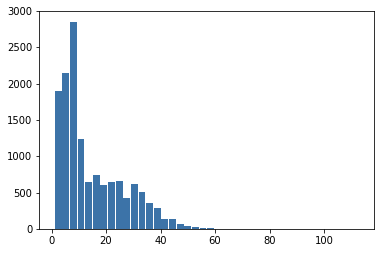

In [8]:
#Show the distribution of sentence length
plt.hist(sentences,bins=40, rwidth=0.9,
                   color='#3c73a8',log=False)

plt.show()

### Number of Entities in Training Dataset

In [9]:
#What is the most popular entity - Entity counter
entities = []
for sentence in train:
    for word in sentence:
        entities.append(word[1])

In [10]:
Counter(entities)
#pd.DataFrame.from_dict(c, orient='index').reset_index()

Counter({'B-ORG': 6321,
         'O': 169578,
         'B-MISC': 3438,
         'B-PER': 6600,
         'I-PER': 4528,
         'B-LOC': 7140,
         'I-ORG': 3704,
         'I-MISC': 1155,
         'I-LOC': 1157})

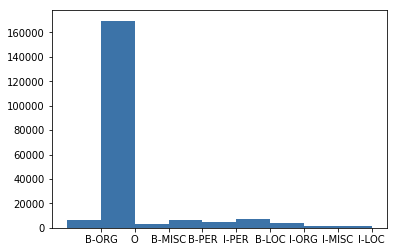

In [14]:
labels, values = zip(*Counter(entities).items())
indexes = np.arange(len(labels))
width=1
plt.bar(indexes, values, width, color='#3c73a8')
plt.xticks(indexes + width * 0.5, labels)
plt.show()